**Задачи:**



**Часть 1:**
**Гипотезы


* <a href='#ice'>Фреймворк ICE.</a>
* <a href='#rice'>Фреймворк RICE.</a>
* <a href='#result'>Выводы.</a>

**Часть 2:**
**Анализ А/В теста**

* <a href='#1'>Построить график кумулятивной выручки по группам.</a>
* <a href='#2'>Построить график кумулятивного среднего чека по группам.</a>
* <a href='#3'>Построить график относительного изменения кумулятивного среднего чека группы B к группе A.<a/>
* <a href='#4'>Построить график кумулятивного среднего количества заказов по группам.<a/> 
* <a href='#5'>Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A.<a/>
* <a href='#6'>Построить точечный график количества заказов по пользователям.<a/>
* <a href='#7'>Вывести 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.<a/>
* <a href='#8'>Пстроить точечный график стоимостей заказов. <a/>
* <a href='#9'>Вывести 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.<a/>
* <a href='#10'>Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.<a/>
* <a href='#11'>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. <a/>
* <a href='#12'>Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. <a/>
* <a href='#13'>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.<a/>
* <a href='#14'>Выводы по АВ тесту<a/>

**Импортируем необходимые для работы библиотеки**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

# Часть 1.

**Загружаем данные с гипотезами**

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')
hypo.columns = [x.lower() for x in hypo.columns.values]
hypo

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**Рассчитываем фреймворки ICE и RICE по формулам**

In [3]:
hypo['ICE'] = hypo['impact'] * hypo['confidence'] / hypo['efforts']
hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['efforts']

**Сортируем гипотезы по убыванию фреймворка ICE**<a id='ice'></a>

In [4]:
hypo_ice = hypo.sort_values(by='ICE', ascending=False)
hypo_ice

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


**Сортируем гипотезы по убыванию фреймворка RICE**<a id='rice'></a>

In [5]:
hypo_rice = hypo.sort_values(by='RICE', ascending=False)
hypo_rice

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


<a id='result'></a>
**Гипотезы под номером 1, 3, 4, 5  в обоих фреймворках являются самыми неприоритетными, так как либо требуют больших затрат, либо не сильно повлияют на удовлетворение пользователем и не имеют уверенности в том, что это сработает.**

**В то время как гипотезы с номерами 0, 2, 6, 7, 8 не требуют огромных затрат, отдел маркетинга уверен в том, что это сработает, окажет позитивное влияние влияние на пользователей (кроме 2 и 6 гипотезы)**

**С переходом от фреймворка ICE к RICE, приоритетность гипотез немного меняется, из за того, что на нее влияет новый показатель 'reach'. в фреймворке RICE самыми приоритетными гипотезами (повлияющими почти на всех пользователей) будут 7 и 2, 
в ICE 8 и 0 (не требующие больших затрат, с позитивным влиянием на аудиторию и уверенностью отдела маркетинга).**

# Часть 2.

**Импортируем данные о заказах и поветителях**

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

In [16]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [17]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [18]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [19]:
orders.groupby('group').count()

,transactionId,visitorId,date,revenue
group,,,,
A,557,557,557,557
B,640,640,640,640


In [20]:
# код ревьюера
# кол-во уникальных покупателей в каждой группе
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [21]:
# код ревьюера
# кол-во визитов в каждой группе
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [22]:
visitors.groupby('group').count()

,date,visitors
group,,
A,31,31
B,31,31


В тесте участвуют две группы: А и В. Даты проведения теста: c 2019-08-01 по 2019-08-31. В группе A 557 пользователей, в группе В 640.

In [61]:
len(orders.groupby('visitorId').agg({'group':'nunique'}).query('group == 2'))

58

**58 пользователей, попавших в обе группы**

**Группируем данные о заказах по дате и группе а/в тестирования**

In [23]:
datesGroups = orders[['date','group']].drop_duplicates() 

**Аггрегируем данные, для сбора куммулятивных значений по датафреймам**

In [24]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [27]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Получаем куммулятивный, объедененный датафрейм**

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [29]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Разделяем куммулятивные данные по группам A/B и строим график кумулятивной выручки по группам** <a id='1'></a>

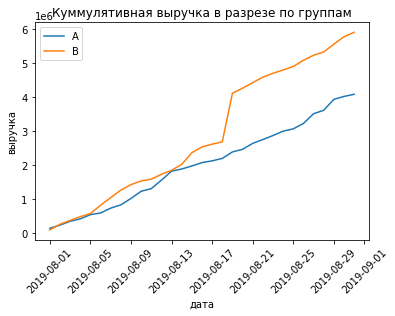

In [30]:
cumulativeA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')

plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')
plt.title('Куммулятивная выручка в разрезе по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.xticks(rotation = 45)
plt.legend(); 

**На графике мы видим, что первые 5 дней выручка растет равномерно по обоим группам, после чего, лидировать начинает группа В, после чего группа В с 2019-08-18 по 2019-08-19 число резко растет, после чего начинает равномерный рост.**

**Строим график среднего чека по группам.**<a id='2'></a>

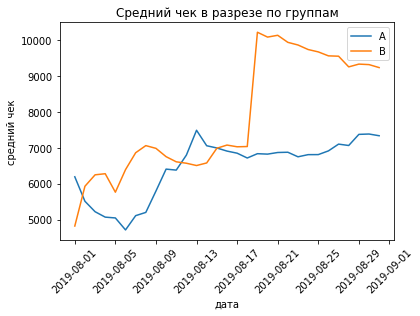

In [31]:
plt.plot(cumulativeA['date'], cumulativeA['revenue']/cumulativeA['orders'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue']/cumulativeB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('Средний чек в разрезе по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend(); 

**По графику видно, что по началу СЧ группы А идет на спад, после чего начинает расти. В группе В так же видим резкий всплеск в с 18-е по 19-е число, после чего идет на спад. Возможно, всплеск вызван большим количеством заказов в эти дни, либо большой суммой заказов.**

**Строим график относительного изменения кумулятивного среднего чека группы B к группе A.**<a id='3'></a>

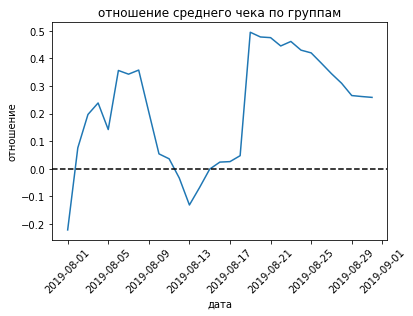

In [56]:
mergedCumulativeRevenue = cumulativeA.merge(cumulativeB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left',
                                                   suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('отношение среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('отношение');

**На графике отсношения среднего чека группы А к группе В, можно увидеть резкие скачки, если отношение среднего чека имеет такие перепады, вероятнее всего пользователь сделал крупный заказ**

**Строим график кумулятивной конверсии по группам.**<a id='4'></a>

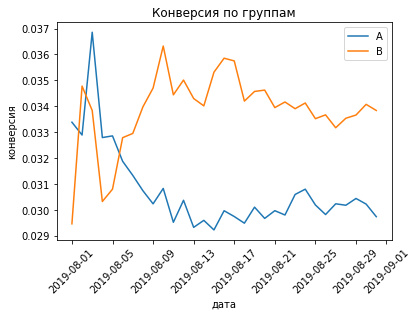

In [33]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeconvA = cumulativeData[cumulativeData['group']=='A']


cumulativeconvB = cumulativeData[cumulativeData['group']=='B']


plt.plot(cumulativeconvA['date'], cumulativeconvA['conversion'], label='A')
plt.plot(cumulativeconvB['date'], cumulativeconvB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title('Конверсия по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.legend();

**На графике видно, что в начале периода, конверсия пользователей  показывает резкий рост у обеих групп, после чего следует не менее резкий спад. После спада, у группы А, наблюдается стагнация с небольшими всплесками. У группы В - резкий взлет с последующим плавным падением.**

**Строим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.**<a id='5'></a>

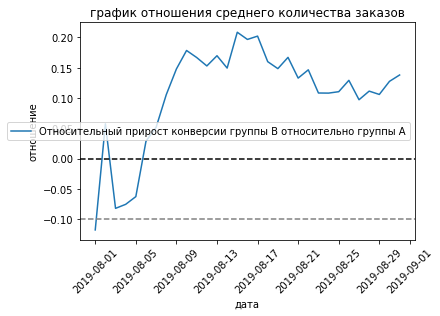

In [34]:
mergedCumulativeConversions = cumulativeconvA[['date','conversion']].merge(cumulativeconvB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('график отношения среднего количества заказов')
plt.xlabel('дата')
plt.ylabel('отношение')
plt.xticks(rotation=45);

**После 2019-08-05 прирост конверсии группы В преобладает над приростом группы А**

In [35]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

**Строим точечный график количества заказов по пользователям.**<a id='6'></a>

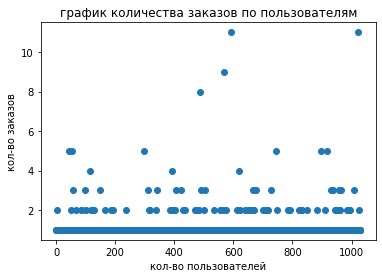

In [57]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('график количества заказов по пользователям')
plt.xlabel('кол-во пользователей')
plt.ylabel('кол-во заказов');

**На точечном графике можем наблюдать что в основном пользователи делают по одному заказу, но есть и редкие исключения, сделавшие по 11 заказов, возможно из за них был резкий рост выручки и конверсии в группе В. Для отчистки данных от выбросов необходимо узнать 95-ый и 99-ый перцентиль количества заказов на одного пользователя и выбрать границу для идентификации аномальных пользователей**

**Считаем 95-й и 99-й перцентили количества заказов на пользователя.**<a id='7'></a>

In [37]:
print(np.percentile(ordersByUsers['orders'], [95,97,98,99]))

[2. 2. 3. 4.]


**Посчитав 95, 97, 98 и 99 перцентиль, можно назвать пользователей аномальными, если они сделали больше 2 заказов.**

**Строим точечный график стоимостей заказов.**<a id='8'></a>

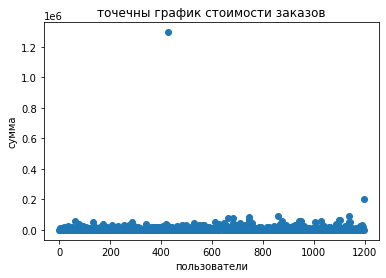

In [58]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('точечны график стоимости заказов')
plt.xlabel('пользователи')
plt.ylabel('сумма'); 

**Считаем 95-й и 99-й перцентили стоимости заказов.**<a id='9'></a>

In [39]:
print(np.percentile(orders['revenue'], [95, 97, 98, 99])) 

[28000.  35485.  44133.2 58233.2]


**Пользователи, сделавшие заказов на сумму выше 44133, можно считать аномальными.**

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [41]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [42]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [43]:
print(data.head())

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [45]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [46]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


**Считаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.**<a id='10'></a>

**H0: статистически значимых различий в среднем числе заказов между группами в исходных данных нет**

**H1: статистически значимые различия в среднем числе заказов между группами в исходных данных есть**

In [47]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]), 'p-value')

print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1), 'конверсия')


0.01679 p-value
0.13808 конверсия


**p-value меньше 0.05, гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы В равен 13.8%**

**Считаем относительное различие среднего чека в группе по сырым данным.**<a id='11'></a>

**H0: статистически значимых различий в среднем чеке между группами в исходных данных нет**

**H1: статистически значимые различия в среднем чеке между группами в исходных данных есть**

In [48]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]), 'p=value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), 'отношение среднего чека')

0.729 p=value
0.259 отношение среднего чека


**P-value значительно больше 0.05, нулевую гипотезу не отвергаем.**

**Средний чек группы В, выше СЧ группы А.**

**Очищаем данные от выбросов, как мы помним по высчитанным перценталям, что аномальными пользователями будут те, кто сделал больше 2 заказов и сумма заказов больше 44133**

In [60]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95,97,98,99])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95,97,98,99])[1]]['userId']
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 98])[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [50]:
#код ревьюера
#граница для суммы заказа
np.percentile(orders['revenue'], [95, 98])[1]

44133.199999999866

In [51]:
#код ревьюера
#граница для кол-ва заказов
np.percentile(ordersByUsers['orders'], [95,97,98,99])[1]

2.0

In [52]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape

(40,)

**Фильтруем данные и присваиваем переменным**

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


**Считаем относительный прирост среднего числа заказов по очищенным данным**<a id='12'></a>

**H0: статистически значимых различий в среднем числе заказов между группами в обработанных данных нет**

**H1: статистически значимые различия в среднем числе заказов между группами в обработанных данных есть**

In [54]:
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), 'p-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1), 'конверсия') 

0.00740 p-value
0.185 конверсия


**По очищенным данным прирость среднего числа заказов у группы В 18.5%, p-value меньше 0.05, нулевую гипотезу отвергаем**

**Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

**H0: статистически значимых различий в среднем чеке между группами в обработанных данных нет**

**H1: статистически значимые различия в среднем чеке между группами в обработанных данных есть**

In [55]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ), 'p-value'
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ), 'средний чек'
) 

0.994 p-value
0.037 средний чек


**p-value увеличилось, в очищенном датафрейме, у группы В не такая сильная разница между сегментами, p-value , p-value , намного больше 0.05, нулевую гипотезу не отвергаем**<a id='13'></a>

# Выводы: <a id='14'></a>

* Графики, построенные на основе сырых данных (выручка, средний чек и конверсия) показывают превосходство группы В над группой А по всем показателям. У группы В наблюдаются резки скачки на графиках. Возможно, что в группе В есть 'аномальный пользователь(пользователи)', которые мешают справедливой оценке проведенного теста.



* На точечных графиках и по выведенным 95 - 99 перцентилям, можно действительно заметить, выбивающиеся из общей группы значения. За аномальные значения мы приняли людей, сделавших больше 2-ух заказов и с общей суммой заказа 44133 рубля.



* на графиках отношения среднего чека и общего числа заказов группы В к группе А, можно наблюдать резкие и высокие скачки по среднему чеку и стабильное превосходство по среднему куммулятивному числу заказов группы А над группой В.



* После разделения пользователей на группы по признаку принадлежности к группе тестирования, я посчитал статистическую значимость среднего количества заказов и статистическую значимость среднего чека **по полным данным**. 
-- по статистической значимости среднего количества заказов, группа В имеет относительный выигрыш в 13.8%
-- по статистической значимости среднего чека = 25.9%



* **После отчистки** аномальных пользователей, которых оказалось 40:
-- по статистической значимости среднего количества заказов, группа В имеет относительный выигрыш в 18.5%
-- по статистической значимости среднего чека = -0.01%



* Сравнивая сырые и очищенные данные, можно заметить, что результаты отличаются. Аномальные пользователи действительно влияли на результат теста. Отношение среднего количества заказов группы В выросло, в то время как отношение среднего чека существенно снизилось. Тест показал, что группа В в среднем заказывает чаще, чем группа А, но проигрывает ей по среднему чеку.



* Если смотреть на тест по сырым данным, то можно предположить что в тесте, группа В является успешной, но после отчистки мы увидели, что в группе В были выбросы, мешающие объективной оценке. Можно остановить тест, зафиксировав победу группы В по среднему количеству заказов, но отсутствие изменений по статистической значимости среднего чека.